In [144]:
import numpy as np
import pandas as pd

In [145]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [146]:
train.shape, test.shape

((12980, 12), (4399, 11))

In [147]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [148]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [149]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [150]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [151]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

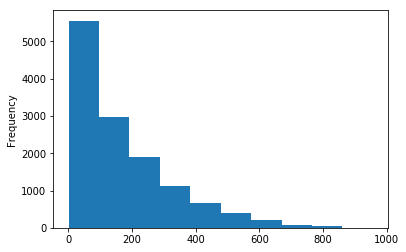

In [152]:
train['count'].plot.hist()

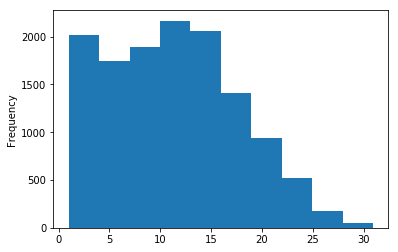

In [153]:
np.sqrt(train['count']).plot.hist()

In [154]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,-0.010959,0.014343,-0.013005,0.394560,0.397765,0.181712,-0.135762,0.104657,0.085699,0.100687
holiday,-0.010959,1.000000,-0.248558,-0.018406,-0.025104,-0.032903,-0.029520,0.021646,0.029135,-0.046053,-0.029340
workingday,0.014343,-0.248558,1.000000,0.052788,0.060589,0.064840,0.028026,0.001986,-0.307930,0.131819,0.018842
weather,-0.013005,-0.018406,0.052788,1.000000,-0.093655,-0.094877,0.432497,0.011120,-0.161752,-0.139034,-0.161018
temp,0.394560,-0.025104,0.060589,-0.093655,1.000000,0.991839,-0.048478,-0.008669,0.459414,0.344451,0.415938
atemp,0.397765,-0.032903,0.064840,-0.094877,0.991839,1.000000,-0.031606,-0.049997,0.454015,0.342345,0.412644
humidity,0.181712,-0.029520,0.028026,0.432497,-0.048478,-0.031606,1.000000,-0.296975,-0.320253,-0.279501,-0.322269
windspeed,-0.135762,0.021646,0.001986,0.011120,-0.008669,-0.049997,-0.296975,1.000000,0.079524,0.100579,0.105607
casual,0.104657,0.029135,-0.307930,-0.161752,0.459414,0.454015,-0.320253,0.079524,1.000000,0.509175,0.707938
registered,0.085699,-0.046053,0.131819,-0.139034,0.344451,0.342345,-0.279501,0.100579,0.509175,1.000000,0.968329


In [155]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [156]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

In [157]:
train['datetime']=pd.to_datetime(train.datetime)

In [158]:
train["date"]=train.datetime.dt.date
train["month"]=train.datetime.dt.month
train["hour"]=train.datetime.dt.hour

In [159]:
test["date"]=train.datetime.dt.date
test["month"]=train.datetime.dt.month
test["hour"]=train.datetime.dt.hour

In [160]:
training = train[0:9999]
validation = train[10000:]

In [161]:
train=train.drop(['date','datetime','atemp'],axis=1)
test=test.drop(['date','datetime','atemp'],axis=1)
training=training.drop(['date','datetime','atemp'],axis=1)
validation=validation.drop(['date','datetime','atemp'],axis=1)

In [162]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [163]:
x_train = training.drop('count', 1)
y_train = np.sqrt(training['count'])
x_val = validation.drop('count', 1)
y_val = np.sqrt(validation['count'])

In [164]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((9999, 11), (9999,), (2980, 11), (2980,))

In [165]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [166]:
prediction = lreg.predict(x_val)

In [167]:
def rmsle(y, y_):
    y = np.power(y,2),   # taking the exponential as we took the log of target variable
    y_ = np.power(y_,2)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [168]:
rmsle(y_val,prediction)

0.4488429584601885

In [169]:
from sklearn.tree import DecisionTreeRegressor

In [170]:
dt_reg = DecisionTreeRegressor(max_depth=5)
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [171]:
predict=dt_reg.predict(x_val)

In [172]:
rmsle(y_val, predict)

0.1686780010878057

In [173]:
test_prediction=dt_reg.predict(test)
final_prediction = np.power(test_prediction,2)

In [174]:
sub=pd.DataFrame()
sub['count'] = final_prediction
sub.to_csv('sub.csv', header=True, index=False)